In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

see https://en.wikipedia.org/wiki/WordNet for details

In [6]:
import nltk
from nltk.corpus import wordnet as wn

targetWord = 'love'
syns = wn.synsets(targetWord)
wordCloud = []
wordCloudSim = []
for word in syns:
    for lemma in word.lemmas():
        if lemma.name() not in wordCloud:
            wordCloud.append(str(lemma.name()))
            
wordCloud

['love',
 'passion',
 'beloved',
 'dear',
 'dearest',
 'honey',
 'sexual_love',
 'erotic_love',
 'lovemaking',
 'making_love',
 'love_life',
 'enjoy',
 'sleep_together',
 'roll_in_the_hay',
 'make_out',
 'make_love',
 'sleep_with',
 'get_laid',
 'have_sex',
 'know',
 'do_it',
 'be_intimate',
 'have_intercourse',
 'have_it_away',
 'have_it_off',
 'screw',
 'fuck',
 'jazz',
 'eff',
 'hump',
 'lie_with',
 'bed',
 'have_a_go_at_it',
 'bang',
 'get_it_on',
 'bonk']

the problem with this is that, this list only contains 'lemmas' and not various forms of the words (loved, lover, loving, ...)

In [7]:
print wn.synsets('do_it')
print wn.synset('love.n.01').wup_similarity(wn.synset('do_it.v.01'))

[Synset('sleep_together.v.01')]
None


In [8]:
import os.path
import urllib
import pandas as pd

columns = ['ngram', 'year', 'match_count', 'volume_count']
dataf = pd.DataFrame(columns=columns)
for word in wordCloud:
    print word
    wordsp = word.split('_')
    n = len(wordsp)
    indices = word[:min(2,n)]
    filename = 'googlebooks-eng-all-{}gram-20120701-{}.gz'.format(n, indices)
    url = "http://storage.googleapis.com/books/ngrams/books/"+filename
    if not os.path.isfile(filename):
        urllib.urlretrieve (url, filename)
    elif int(urllib.urlopen(url).info()['Content-Length']) != os.stat(filename).st_size:
        urllib.urlretrieve (url, filename)
    else:
        for chunk in pd.read_table(filename, sep='\t', header=None, names=columns, chunksize=10000):
            dataf = dataf.append(chunk[chunk.ngram == ' '.join(word.split('_'))], ignore_index=True)
            print sum(chunk.ngram == ' '.join(word.split('_')))
dataf.tail()

love
passion
beloved
dear
dearest
honey
sexual_love
erotic_love
lovemaking
making_love
love_life
enjoy
sleep_together
roll_in_the_hay
make_out
make_love
sleep_with
get_laid
have_sex
know
do_it
be_intimate
have_intercourse
have_it_away
have_it_off
screw
fuck
jazz
eff
hump
lie_with
bed
have_a_go_at_it
bang
get_it_on
bonk


,ngram,year,match_count,volume_count
9958,bonk,2004,738,498
9959,bonk,2005,778,502
9960,bonk,2006,635,436
9961,bonk,2007,633,444
9962,bonk,2008,843,686


In [9]:
dataf.to_csv('dataset_for_'+targetWord+'_wordCloud.csv.gz', sep=',', compression='gzip')

In [20]:
dataf_groups = dataf.groupby(by='year', as_index=True).sum()

<IPython.core.display.Javascript object>


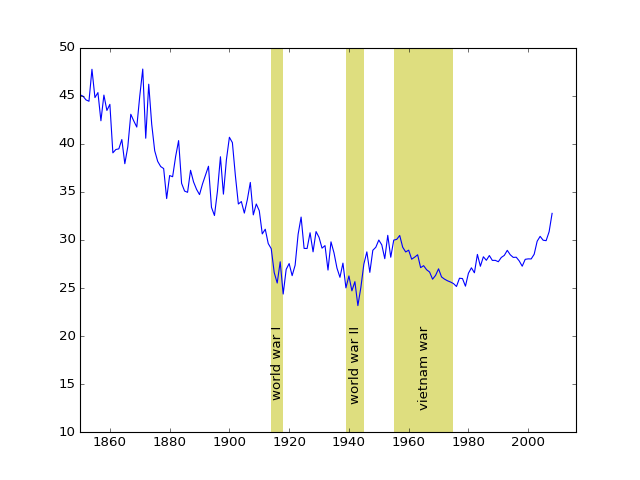

(10, 50)

In [82]:
#plt.plot(dataf_groups.index.values, dataf_groups.match_count/dataf_groups.volume_count)
plt.plot(dataf[dataf.ngram=='love'].year, dataf[dataf.ngram=='love'].match_count/dataf[dataf.ngram=='love'].volume_count)
#plt.plot(dataf_groups.index.values, dataf_groups.match_count)
plt.axvspan(1914, 1918, color='y', alpha=0.5, lw=0)
plt.annotate('world war I', xy=(1914,20), xytext=(1914,20), rotation=np.degrees(3.14/2))
plt.axvspan(1939, 1945, color='y', alpha=0.5, lw=0)
plt.annotate('world war II', xy=(1940,20), xytext=(1940,20), rotation=np.degrees(3.14/2))
plt.axvspan(1955, 1975, color='y', alpha=0.5, lw=0)
plt.annotate('vietnam war', xy=(1963,20), xytext=(1963,20), rotation=np.degrees(3.14/2))
plt.xlim(1850,2016)
plt.ylim(10,50)